In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('ps01.ok')

Assignment: Problem Set 1. The Very Long Run View
OK, version v1.14.20



# Problem Set 1. The Very Long Run View

These problem set assignments are a required part of the course.

Collaborating on the problem sets is more than okay—it is encouraged! Seek help from a classmate or an instructor or a roommate or a passerby when you get stuck! (Explaining things is beneficial, too—the best way to solidify your knowledge of a subject is to explain it.) 

But the work has to be your own: no cutting-&-pasting from others' problem sets, please! We want you to learn this stuff, and your fingers typing every keystroke is an important way of building muscle memory here.

In this problem set, you will...

1. take a look at the very long-term structure of human economic history
2. take a look at the patterns of growth across countries over the long 20th century 1870-2016

Let us get started!

## 1. Preliminaries

First, we set up the computing environment: 

In [2]:
# set up the computing environment: import libraries, & ensure
# that graphs appear inline in the notebook & not in extra
# windows:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Next we load in and organize our basic data—or, rather, guesses—of the very long term global structure of human economic history.

We will use estimates of a very few quantities:

* The year at which an observation is made or an era begins, which we will call $ t $ or `year`
* The stock of useful human ideas about technology and organization, which we will call $ H $ or `human_ideas`
* The level of labor efficiency or productivity, which we will call $ E $ or `labor_efficiency`
* In this notetook, $ E $ will be the same as productivity or real income per capita, which we will call $ y $ or `income_level`
* The level of human population, which we will call $ P $ or `population`

Plus:

* The initial year at which each of the eras we divide history into begins, which we will call $ t_{era} $ or `initial_year`
* The span of time each era covers, which we will call `span`
* The proportional growth rates over each era $ n $, $ g $, and $ h $ of human population $ P $, productivity and labor efficiency $ y $, and of the ideas stock $ H $

In [3]:
# the "data" (actually, more like guesses) of the very long term
# structure of human economic history. we feed it into a dataframe,
# make sure that the dataframe knows that the year is an integer
# & not a floating point number, & set up an extra variable 
# `initial_year`, to remind us of the starting point of all
# of the periods into which we divide very long term human 
# economic history:

long_run_growth_list = [
    [-68000, 1, 1200, 0.1],
    [-8000, 5, 1200, 2.5],
    [-6000, 6.3, 900, 7],
    [-3000, 9.2, 900, 15],
    [-1000, 16.8, 900, 50],
    [1, 30.9, 900, 170],
    [800, 41.1, 900, 300],
    [1500, 53, 900, 500],
    [1770, 79.4, 1100, 750],
    [1870, 123.5, 1300, 1300],
    [2020, 2720.5, 11842, 7600]
    ]

long_run_growth_df = pd.DataFrame(
  data=np.array(long_run_growth_list), columns = ['year', 'human_ideas', 'income_level', 'population']                             
  )

long_run_growth_df['year'] = long_run_growth_df['year'].apply(np.int64)
initial_year = long_run_growth_df['year'][0:10]

In [4]:
# now we calculate era lengths—spans—and growth rates over
# our periods of real income per capita g, of population n,
# & of the growth rate of the value of useful human ideas
# about technology and organization h:

span = []
g = []
h = []
n = []

for t in range(10):
    span = span +[long_run_growth_df['year'][t+1]-long_run_growth_df['year'][t]]
    h = h + [np.log(long_run_growth_df['human_ideas'][t+1]/long_run_growth_df['human_ideas'][t])/span[t]]
    g = g + [np.log(long_run_growth_df['income_level'][t+1]/long_run_growth_df['income_level'][t])/span[t]]
    n = n + [np.log(long_run_growth_df['population'][t+1]/long_run_growth_df['population'][t])/span[t]]
    

In [5]:
# finally, we tell the dataframe that the data are naturally
# indexed by the year, & then check to make sure that
# nothing has gone wrong yet:

long_run_growth_df.set_index('year', inplace=True)

long_run_growth_df['income_level']

year
-68000     1200.0
-8000      1200.0
-6000       900.0
-3000       900.0
-1000       900.0
 1          900.0
 800        900.0
 1500       900.0
 1770      1100.0
 1870      1300.0
 2020     11842.0
Name: income_level, dtype: float64

### 2. The most eagle's eye view

Text(0, 0.5, 'Annual Income per Capita, 2020 Dollars')

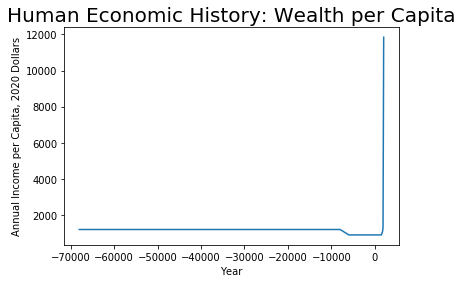

In [6]:
long_run_growth_df['income_level'].plot()
plt.title('Human Economic History: Wealth per Capita', size=20)
plt.xlabel('Year')
plt.ylabel('Annual Income per Capita, 2020 Dollars')

Text(0, 0.5, 'Millions')

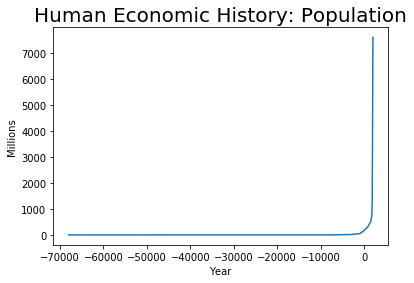

In [7]:
long_run_growth_df['population'].plot()
plt.title('Human Economic History: Population', size=20)
plt.xlabel('Year')
plt.ylabel('Millions')
                   

Text(0, 0.5, 'Index of Useful Ideas Stock')

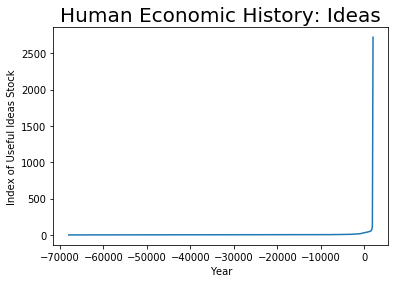

In [8]:
long_run_growth_df['human_ideas'].plot()
plt.title('Human Economic History: Ideas', size=20)
plt.xlabel('Year')
plt.ylabel('Index of Useful Ideas Stock')

Freaky, no?

This is why U.C. Davis economic historian Greg Clark says that there is really only one graph that is important in economic history.

After the spring of coronavirus, we are used to exponential growth processes—things that explode, but only after a time in which they gather force, and which look like straight line growth on a graph plotted on a logarithmic scale. Let us plot income levels, populations, and ideas stock values on log scales and see what we see:

Text(0, 0.5, 'Log Annual Income per Capita, 2020 Dollars')

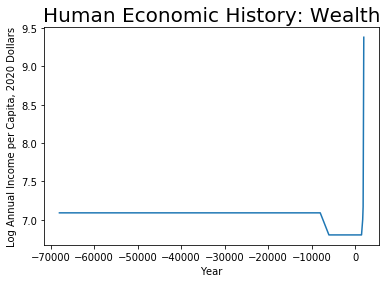

In [9]:
np.log(long_run_growth_df['income_level']).plot()
plt.title('Human Economic History: Wealth', size=20)
plt.xlabel('Year')
plt.ylabel('Log Annual Income per Capita, 2020 Dollars')

Text(0, 0.5, 'Log Millions')

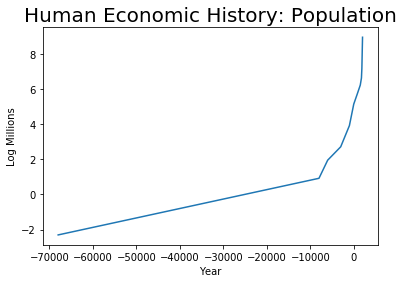

In [10]:
np.log(long_run_growth_df['population']).plot()
plt.title('Human Economic History: Population', size=20)
plt.xlabel('Year')
plt.ylabel('Log Millions')          

Text(0, 0.5, 'Log Index of Useful Ideas Stock')

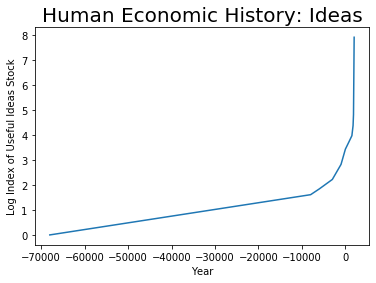

In [11]:
np.log(long_run_growth_df['human_ideas']).plot()
plt.title('Human Economic History: Ideas', size=20)
plt.xlabel('Year')
plt.ylabel('Log Index of Useful Ideas Stock')

In [12]:
# we have seen that we can simply print a dataframe by putting its name by itself
# on the last line of a code cell:

long_run_growth_df

,human_ideas,income_level,population
year,,,
-68000,1.0,1200.0,0.1
-8000,5.0,1200.0,2.5
-6000,6.3,900.0,7.0
-3000,9.2,900.0,15.0
-1000,16.8,900.0,50.0
1,30.9,900.0,170.0
800,41.1,900.0,300.0
1500,53.0,900.0,500.0
1770,79.4,1100.0,750.0


In [13]:
# we can make the printing prettier by defining a format dictionary
# `format_dict` (or whatever other name we choose) and feeding it
# to the dataframe, telling the dataframe that we want it to evaluate
# itself using its `.style` method, and that `style()` should use
# its `.format()` submethod to understand what the `format_dict`
# is asking it to do:

format_dict = {'year': '{d}', 'human_ideas': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}'}

long_run_growth_df.style.format(format_dict)

,human_ideas,income_level,population
year,,,
-68000,1,"$1,200",0.1
-8000,5,"$1,200",2.5
-6000,6,$900,7.0
-3000,9,$900,15.0
-1000,17,$900,50.0
1,31,$900,170.0
800,41,$900,300.0
1500,53,$900,500.0
1770,79,"$1,100",750.0


In [16]:
# remember those growth rates we calculated? we can stuff them
# into their own dataframe and take a look:

long_run_growth_rates_df = pd.DataFrame(
    data=np.array([initial_year, span, h, g, n]).transpose(),
    columns = ['initial_year', 'span', 'h', 'g', 'n'])

long_run_growth_rates_df['initial_year'] = long_run_growth_rates_df['initial_year'].apply(np.int64)
long_run_growth_rates_df.set_index('initial_year', inplace=True)

long_run_growth_rates_df

,span,h,g,n
initial_year,,,,
-68000,60000.0,0.000027,0.000000,0.000054
-8000,2000.0,0.000116,-0.000144,0.000515
-6000,3000.0,0.000126,0.000000,0.000254
-3000,2000.0,0.000301,0.000000,0.000602
-1000,1001.0,0.000609,0.000000,0.001223
1,799.0,0.000357,0.000000,0.000711
800,700.0,0.000363,0.000000,0.000730
1500,270.0,0.001497,0.000743,0.001502
1770,100.0,0.004417,0.001671,0.005500


In [17]:
# here making the printing prettier really matters—for us humans,
# at least, as we try to read what is going on:

format_dict = { 'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}'}

long_run_growth_rates_df.style.format(format_dict)

,span,h,g,n
initial_year,,,,
-68000,60000,0.003%,0.00%,0.01%
-8000,2000,0.012%,-0.01%,0.05%
-6000,3000,0.013%,0.00%,0.03%
-3000,2000,0.030%,0.00%,0.06%
-1000,1001,0.061%,0.00%,0.12%
1,799,0.036%,0.00%,0.07%
800,700,0.036%,0.00%,0.07%
1500,270,0.150%,0.07%,0.15%
1770,100,0.442%,0.17%,0.55%


In [19]:
eras = ['at the dawn', 'agriculture & herding', 'proto-agrarian age',
        'writing', 'axial age', 'late-antiquity pause', 'middle age', 'commercial revolution',
        'industrial revolution', 'modern economic growth', 'whatever the 21st century brings']

long_run_growth_df['eras'] = eras

format_dict = {'year': '{d}', 'human_ideas': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}'}

long_run_growth_df.style.format(format_dict)

,human_ideas,income_level,population,eras
year,,,,
-68000,1,"$1,200",0.1,speciation? language?
-8000,5,"$1,200",2.5,agriculture & herding
-6000,6,$900,7.0,proto-agrarian age
-3000,9,$900,15.0,writing
-1000,17,$900,50.0,axial age
1,31,$900,170.0,late-antiquity pause
800,41,$900,300.0,middle age
1500,53,$900,500.0,commercial revolution
1770,79,"$1,100",750.0,industrial revolution


In [21]:
eras = eras[0:10]

long_run_growth_rates_df['era'] = era

format_dict = { 'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}'}

long_run_growth_rates_df.style.format(format_dict)

,span,h,g,n,eras
initial_year,,,,,
-68000,60000,0.003%,0.00%,0.01%,speciation? language?
-8000,2000,0.012%,-0.01%,0.05%,agriculture & herding
-6000,3000,0.013%,0.00%,0.03%,proto-agrarian age
-3000,2000,0.030%,0.00%,0.06%,writing
-1000,1001,0.061%,0.00%,0.12%,axial age
1,799,0.036%,0.00%,0.07%,late-antiquity pause
800,700,0.036%,0.00%,0.07%,middle age
1500,270,0.150%,0.07%,0.15%,commercial revolution
1770,100,0.442%,0.17%,0.55%,industrial revolution


## 1. Jupyter notebooks
This webpage is called a Jupyter notebook. A notebook is a place to write programs and view their results, and also to write text.

A notebook is thus an editable computer document in which you can write computer programs; view their results; and comment, annotate, and explain what is going on. Project jupyter <https://en.wikipedia.org/wiki/Project_Jupyter> is headquartered here at Berkeley, where jupyter originator and ringmaster Fernando Pérez <https://en.wikipedia.org/wiki/Fernando_Pérez_(software_developer)> works: its purpose is to build human-friendly frameworks for interactive computing. If you want to see what Fernando looks and sounds like, you can load and watch a 15-minute inspirational video by clicking on "YouTubeVideo" below and then on the `▶` in the toolbar above: 

In [ ]:
from IPython.display import YouTubeVideo
# The original URL is: 
# https://www.youtube.com/watch?v=Wd6a3JIFH0s

YouTubeVideo("Wd6a3JIFH0s")

### 1.1. Text cells
In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format created by Jon Gruber called  markdown <<http://daringfireball.net/projects/markdown/syntax>> to add formatting and section headings. You almost surely want to learn how to use markdown.

After you edit a text cell, click the "run cell" button at the top that looks like `▶` in the toolbar at the top of this window, or hold down `shift` + press `return`, to confirm any changes to the text and formatting. 

(Try not to delete the problem set instructions. If you do, then (a) rename your current notebook via the `Rename` command in the `File` menu so that you do not lose your work done so far, and then reenter the url `http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=lecture-support-2020&branch=master&path=ps01.ipynb` in the web address bar at the top of your browser to download a new, fresh copy of this problem set.)

**Question 1.1.1.** This paragraph is in its own text cell.  Try editing it so that this sentence is the last sentence in the paragraph, and then click the "run cell" ▶| button or hold down `shift` + `return`.  This sentence, for example, should be deleted.  So should this one.

### 1.2. Code cells
Other cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press `▶` or hold down `shift` + press `return`.

Try running this cell:

In [ ]:
print("Hello, World!")

And this one:

In [ ]:
print("\N{WAVING HAND SIGN}, \N{EARTH GLOBE ASIA-AUSTRALIA}!")

The fundamental building block of Python code is an expression. Cells can contain multiple lines with multiple expressions. When you run a cell, the lines of code are executed in the order in which they appear. Every `print` expression prints a line. Run the next cell and notice the order of the output.

In [ ]:
print("First this line is printed,")
print("and then this one.")

**Question 1.2.1.** Change the cell above so that it prints out:

    First this line,
    then the whole 🌏,
    and then this one.

*Hint:* If you're stuck on the Earth symbol for more than a few minutes, try talking to a neighbor or a staff member. That's a good idea for any lab problem.

### 1.3. Writing notebooks
You can use Jupyter notebooks for your own projects or documents.  When you make your own notebook, you'll need to create your own cells for text and code.

To add a cell, click the + button in the menu bar.  It'll start out as a text cell.  You can change it to a code cell by clicking inside it so it's highlighted, clicking the drop-down box next to the restart (⟳) button in the menu bar, and choosing "Code".

**Question 1.3.1.** Add a code cell below this one.  Write code in it that prints out:
   
    A whole new cell! ♪🌏♪

(That musical note symbol is like the Earth symbol.  Its long-form name is `\N{EIGHTH NOTE}`.)

Run your cell to verify that it works.

### 1.4. "Errors"
Python is a language, and like natural human languages, it has rules.  It differs from natural language in two important ways:
1. The rules are *simple*.  You can learn most of them in a few weeks and gain reasonable proficiency with the language in a semester.
2. The rules are *rigid*.  If you're proficient in a natural language, you can understand a non-proficient speaker, glossing over small mistakes.  A computer running Python code is not smart enough to do that.

Whenever you write code, you'll make mistakes.  When you run a code cell that has errors, Python will sometimes produce error messages to tell you what you did wrong.

Errors are okay; even experienced programmers make many errors.  When you make an error, you just have to find the source of the problem, fix it, and move on.

We have made an error in the next code cell.  Run it and see what happens.

(**Note:** In the toolbar, there is the option to click `Cell > Run All`, which will run all the code cells in this notebook in order. However, the notebook stops running code cells if it hits an error, like the one in the cell just below.)

In [ ]:
print("This line is missing something.")

You should see something like this (minus our annotations):

<img src="images/error.jpg" width="600" />

The last line of the error output attempts to tell you what went wrong.  The *syntax* of a language is its structure, and this `SyntaxError` tells you that you have created an illegal structure.  "`EOF`" means "end of file," so the message is saying Python expected you to write something more (in this case, a right parenthesis) before finishing the cell.

There's a lot of terminology in programming languages, but you don't need to know it all in order to program effectively. If you see a cryptic message like this, you can often get by without deciphering it.  (Of course, if you're frustrated, ask a neighbor or a staff member for help.)

Try to fix the code above so that you can run the cell and see the intended message instead of an error.

In [ ]:
print("This line is missing something.")

### 1.5. Programming & testing
Our notebooks include built-in *tests* to check whether your work is correct. Sometimes, there are multiple tests for a single question, and passing all of them is required to receive credit for the question. Please don't change the contents of the test cells. 

Go ahead and attempt Question 1.5.1. Running the cell directly after it will test whether you have assigned `seconds_in_a_decade` correctly in Question 4.1. If you haven't, this test will tell you the correct answer. Resist the urge to just copy it, and instead try to adjust your expression. (Sometimes the tests will give hints about what went wrong...)

**Question 1.5.1.** Assign the name `seconds_in_a_decade` to the number of seconds between midnight January 1, 2010 and midnight January 1, 2020. Note that there are two leap years in this span of a decade. A non-leap year has 365 days and a leap year has 366 days.

*Hint:* If you're stuck, the next section shows you how to get hints.

<!--
BEGIN QUESTION
name: q1_5_1
-->

In [ ]:
# In the next line, replace the ellipsis ("...") after the equals sign ("=")
# with the number of seconds in a decade. Then click the 

seconds_in_a_decade = 60*60*24*(10*365+2)

# Do not change anything else in this cell. Just click the "run cell" button 
# that looks like `▶` in the toolbar at the top of this window, or hold down 
# `shift` +  press`return`:

print(seconds_in_a_decade)

In [ ]:
ok.grade("q1_5_1");

If ok.grade found that you had set the right variable(s) to the proper value(s) that it expected, well and good: you are probably not far off track. If ok.grade reported that you failed any of the tests, go back and think again—and if you are still stuck, call for help.

### 1.6. The kernel
The kernel is a program that executes the code inside your notebook and outputs the results. In the top right of your window, you can see a circle that indicates the status of your kernel. If the circle is empty (⚪), the kernel is idle and ready to execute code. If the circle is filled in (⚫), the kernel is busy running some code. 

Next to every code cell, you'll see some text that says `In [...]`. Before you run the cell, you'll see `In [ ]`. When the cell is running, you'll see `In [*]`. If you see an asterisk (\*) next to a cell that doesn't go away, it's likely that the code inside the cell is taking too long to run, and it might be a good time to interrupt the kernel (discussed below). When a cell is finished running, you'll see a number inside the brackets, like so: `In [1]`. The number corresponds to the order in which you run the cells; so, the first cell you run will show a 1 when it's finished running, the second will show a 2, and so on. 

You may run into problems where your kernel is stuck for an excessive amount of time, your notebook is very slow and unresponsive, or your kernel loses its connection. If this happens, try the following steps:
1. At the top of your screen, click **Kernel**, then **Interrupt**.
2. If that doesn't help, click **Kernel**, then **Restart**. If you do this, you will have to run your code cells from the start of your notebook up until where you paused your work.
3. If that doesn't help, restart your server. First, save your work by clicking **File** at the top left of your screen, then **Save and Checkpoint**. Next, click **Control Panel** at the top right. Choose **Stop My Server** to shut it down, then **Start My Server** to start it back up. Then, navigate back to the notebook you were working on. You'll still have to run your code cells again.

### 1.7. Libraries
There are many add-ons and extensions to the core of python that are useful—indeed essential—to using it to get work done. They are contained in what are called libraries. The rest of this notebook needs three libraries. So let us tell the python interpreter to install them. Run the code cell below to do so: 

In [ ]:
# install the numerical python, python data analysis, and mathematical
# plotting libraries for python

!pip install numpy
!pip install pandas
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib as mpl

### 1.8. Submitting your work
All problem sets in the course will be distributed as notebooks like this one, and you will submit your work from the notebook. We will use a system called OK that checks your work and helps you submit. At the top of each assignment, you'll see a cell like the one below that prompts you to identify yourself. Run it and follow the instructions. Please use your @berkeley.edu address when logging in.

In [ ]:
# this cell will not yet give you directions as to how to login to the
# autograding system
# 
# Later on, after we have hooked this notebook into the autograding 
# system, we will reenable that functionality.

# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, 
# but it won't ask you who you are because it remembers you. 
# However, you will need to log in once per assignment.
# When you log-in please hit return (not shift + return) after typing in your email

from client.api.notebook import Notebook
ok = Notebook('ps00.ok')

When you finish an assignment, you need to submit it by running the submit command below. It's fine to submit multiple times. OK will only try to grade your final submission for each assignment. Don't forget to submit your lab assignment at the end of section, even if you haven't finished everything.

In [ ]:
# this cell is currently "commented out": that is, we have turned the 
# program line into a comment that the python interpreter believes it 
# is supposed to ignore. Later on, after we have hooked this notebook
# into the autograding system, we will reenable it.

# _ = ok.submit()

## 2. Python: numbers & variables

Quantitative information arises everywhere in data science. In addition to representing commands to print out lines, expressions can represent numbers and methods of combining numbers. The expression `3.2500` evaluates to the number 3.25. (Run the cell and see.)

In [ ]:
3.2500

Notice that we didn't have to `print`. When you run a notebook cell, if the last line has a value, then Jupyter helpfully prints out that value for you. However, it won't print out prior lines automatically.

In [ ]:
print(2)
3
4

Above, you should see that 4 is the value of the last expression, 2 is printed, but 3 is lost forever because it was neither printed nor last.

You don't want to print everything all the time anyway.  But if you feel sorry for 3, change the cell above to print it.

### 2.1. Arithmetic
The line in the next cell subtracts.  Its value is what you'd expect.  Run it.

In [ ]:
3.25 - 1.5

Many basic arithmetic operations are built into Python.  The textbook section on [Expressions](http://www.inferentialthinking.com/chapters/03/1/expressions.html) describes all the arithmetic operators used in the course.  The common operator that differs from typical math notation is `**`, which raises one number to the power of the other. So, `2**3` stands for $2^3$ and evaluates to 8. 

The order of operations is the same as what you learned in elementary school, and Python also has parentheses.  For example, compare the outputs of the cells below. The second cell uses parentheses for a happy new year!

In [ ]:
3+6*5-6*3**2*2**3/4*7

In [ ]:
4+(6*5-(6*3))**2*((2**3)/4*7)

In standard math notation, the first expression is

$$3 + 6 \times 5 - 6 \times 3^2 \times \frac{2^3}{4} \times 7,$$

while the second expression is

$$3 + (6 \times 5 - (6 \times 3))^2 \times (\frac{(2^3)}{4} \times 7).$$

**Question 2.1.1.** Write a Python expression in this next cell that's equal to $5 \times (3 \frac{10}{11}) - 50 \frac{1}{3} + 2^{.5 \times 22} - \frac{7}{33} + 3$.  That's five times three and ten elevenths, minus fifty and a third, plus two to the power of half twenty-two, minus seven thirty-thirds plus three.  By "$3 \frac{10}{11}$" we mean $3+\frac{10}{11}$, not $3 \times \frac{10}{11}$.

Replace the ellipses (`...`) with your expression.  Try to use parentheses only when necessary.

*Hint:* The correct output should start with a familiar number.

In [ ]:
5*(3 + 10/11) -50 - 1/3 + 2**(0.5*22) -7/33 + 3

### 2.2. Variables
In natural language, we have terminology that lets us quickly reference very complicated concepts.  We don't say, "That's a large mammal with brown fur and sharp teeth!"  Instead, we just say, "Bear!"

In Python, we do this with *assignment statements*. An assignment statement has a name on the left side of an `=` sign and an expression to be evaluated on the right.

In [ ]:
ten = 3 * 2 + 4

When you run that cell, Python first computes the value of the expression on the right-hand side, `3 * 2 + 4`, which is the number 10.  Then it assigns that value to the name `ten`.  At that point, the code in the cell is done running.

After you run that cell, the value 10 is bound to the name `ten`:

In [ ]:
ten

The statement `ten = 3 * 2 + 4` is not asserting that `ten` is already equal to `3 * 2 + 4`, as we might expect by analogy with math notation.  Rather, that line of code changes what `ten` means; it now refers to the value 10, whereas before it meant nothing at all.

If the designers of Python had been ruthlessly pedantic, they might have made us write

    define the name ten to hereafter have the value of 3 * 2 + 4 

instead.  You will probably appreciate the brevity of "`=`"!  But keep in mind that this is the real meaning.

**Question 2.2.1.** Try writing code that uses a name (like `eleven`) that hasn't been assigned to anything.  You'll see an error!

In [ ]:
eleven

A common pattern in Jupyter notebooks is to assign a value to a name and then immediately evaluate the name in the last line in the cell so that the value is displayed as output. 

In [ ]:
close_to_pi = 355/113
close_to_pi

Another common pattern is that a series of lines in a single cell will build up a complex computation in stages, naming the intermediate results.

In [ ]:
semimonthly_salary = 841.25
monthly_salary = 2 * semimonthly_salary
number_of_months_in_a_year = 12
yearly_salary = number_of_months_in_a_year * monthly_salary
yearly_salary

Names in Python can have letters (upper- and lower-case letters are both okay and count as different letters), underscores, and numbers.  The first character can't be a number (otherwise a name might look like a number).  And names can't contain spaces, since spaces are used to separate pieces of code from each other.

Other than those rules, what you name something doesn't matter *to Python*.  For example, this cell does the same thing as the above cell, except everything has a different name:

In [ ]:
a = 841.25
b = 2 * a
c = 12
d = c * b
d

**However**, names are very important for making your code *readable* to yourself and others.  The cell above is shorter, but it's totally useless without an explanation of what it does.

### 2.3. Application: a physics experiment

On the Apollo 15 mission to the Moon, astronaut David Scott famously replicated Galileo's physics experiment in which he showed that gravity accelerates objects of different mass at the same rate. Because there is no air resistance for a falling object on the surface of the Moon, even two objects with very different masses and densities should fall at the same rate. David Scott compared a feather and a hammer.

You can run the following cell to watch a video of the experiment.

In [ ]:
from IPython.display import YouTubeVideo
# The original URL is: 
# https://www.youtube.com/watch?v=U7db6ZeLR5s

YouTubeVideo("U7db6ZeLR5s")

Here's the transcript of the video:

**167:22:06 Scott**: Well, in my left hand, I have a feather; in my right hand, a hammer. And I guess one of the reasons we got here today was because of a gentleman named Galileo, a long time ago, who made a rather significant discovery about falling objects in gravity fields. And we thought where would be a better place to confirm his findings than on the Moon. And so we thought we'd try it here for you. The feather happens to be, appropriately, a falcon feather for our Falcon. And I'll drop the two of them here and, hopefully, they'll hit the ground at the same time. 

**167:22:43 Scott**: How about that!

**167:22:45 Allen**: How about that! (Applause in Houston)

**167:22:46 Scott**: Which proves that Mr. Galileo was correct in his findings.

**Newton's Law.** Using this footage, we can also attempt to confirm another famous bit of physics: Newton's law of universal gravitation. Newton's laws predict that any object dropped near the surface of the Moon should fall

$$\frac{1}{2} G \frac{M}{R^2} t^2 \text{ meters}$$

after $t$ seconds, where $G$ is a universal constant, $M$ is the moon's mass in kilograms, and $R$ is the moon's radius in meters.  So if we know $G$, $M$, and $R$, then Newton's laws let us predict how far an object will fall over any amount of time.

To verify the accuracy of this law, we will calculate the difference between the predicted distance the hammer drops and the actual distance.  (If they are different, it might be because Newton's laws are wrong, or because our measurements are imprecise, or because there are other factors affecting the hammer for which we haven't accounted.)

Someone studied the video and estimated that the hammer was dropped 113 cm from the surface. Counting frames in the video, the hammer falls for 1.2 seconds (36 frames).

**Question 2.3.1.** Complete the code in the next cell to fill in the data from the experiment.

*Hint:* No computation required; just fill in data from the paragraph above.

<!--
BEGIN QUESTION
name: q2_3_1
-->

In [ ]:
# time t, the duration of the fall in the experiment, in seconds.
# Replace the ellipsis ("...") in the line below with your 
# estimate of the duration of the fall

time = 1.2

# The estimated distance the hammer actually fell, in meters.

# Replace the ellipsis ("...") in the line below with your 
# estimate of the length of the fall

estimated_distance_m = 1.13

In [ ]:
ok.grade("q2_3_1");

**Question 2.3.2.** Now, complete the code in the next cell to compute the difference between the predicted and estimated distances (in meters) that the hammer fell in this experiment.

This just means translating the formula above ($\frac{1}{2}G\frac{M}{R^2}t^2$) into Python code.  You'll have to replace each variable in the math formula with the name we gave that number in Python code.

*Hint:* Try to use variables you've already defined in question 4.1.1

<!--
BEGIN QUESTION
name: q2_3_2
-->

In [ ]:
# First, we've written down the values of the 3 universal constants 
# that show up in Newton's formula.

# G, the universal constant measuring the strength of gravity.
gravity_constant = 6.674 * 10**-11

# M, the moon's mass, in kilograms.
moon_mass_kg = 7.34767309 * 10**22

# R, the radius of the moon, in meters.
moon_radius_m = 1.737 * 10**6

# The distance the hammer should have fallen 
# over the duration of the fall, in meters, 
# according to Newton's law of gravity.  
# The text above describes the formula
# for this distance given by Newton's law.

# **YOU FILL THIS PART IN.**
predicted_distance_m = 0.5 * gravity_constant * moon_mass_kg/(moon_radius_m**2)*time**2

# Here we've computed the difference 
# between the predicted fall distance and the distance we actually measured.
# If you've filled in the above code, this should just work.
difference = predicted_distance_m - estimated_distance_m
difference

In [ ]:
ok.grade("q2_3_2");

### 2.4. Lists
Lists and their siblings, numpy arrays, ordered collections of objects. They allow us to store and access groups of variables and other objects for easy access and analysis. If you want an in-depth look at the capabilities of lists, take a look at <<https://www.tutorialspoint.com/python/python_lists.htm>>

To initialize a list, you use brackets. Putting objects separated by commas in between the brackets will add them to the list. For example, we can create and name an empty list:

In [ ]:
list_example = []
print(list_example)

We can add an object to the end of a list:

In [ ]:
list_example = list_example + [5]
print(list_example)

And we can join ("concatenate") two lists together:

In [ ]:
list_example_two = list_example + [1, 3, 6, 'lists', 'are', 'fun', 4]
print(list_example_two)

To access not the list as a whole but an individual value in the list, simply count from the start of the list, and put the place of the object you want to access in brackets after the name of the list. But you have to start counting from not one but zero. Thus the initial object of a list has index 0, the second object of a list has index 1, and in the list above the eighth object has index 7:

In [ ]:
selected_example = list_example_two[7]
print(selected_example)

Lists do not have to be made up of elements of the same kind. Indices do not have to be taken one at a time, either. Instead, we can take a slice of indices and return the elements at those indices as a separate list. Suppose we just want to select out items 4 through 6 from a list. We can do so:

In [ ]:
selected_list = list_example_two[4:7]
print(selected_list)

We can select out the largest and smallest items of a list via `min` and `max`:

In [ ]:
# A list containing six integers.
a_list = [1, 6, 4, 8, 13, 2]

# Another list containing six integers.
b_list = [4, 5, 2, 14, 9, 11]

print('Max of a_list:', max(a_list))
print('Min of b_list:', min(a_list))

Numpy arrays are siblings of lists that can be operated on arithmetically with much more versatility than regular lists. Let us start by making an array that consists of the numbers from zero to nine:

In [ ]:
example_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(example_array)

This could have been accomplished more quickly:

In [ ]:
example_array_2 = np.arange(10)
print('Undoubled Array: ', example_array_2)

Multiplying a list and an array by a number produce different results:

In [ ]:
print('Multiplying a list by 2: ', 2 * b_list)
print('Multiplying an array by 2: ',2 * example_array_2)

### 2.5. Comment your code!
You may have noticed these lines in the cell in which you answered Question 4.1:

    # Change the next line 
    # so that it computes the number of seconds in a decade 
    # and assigns that number the name, seconds_in_a_decade.
    
This is called a *comment*. It doesn't make anything happen in Python; Python ignores anything on a line after a `#`.  Instead, it's there to communicate something about the code to you, the human reader. Comments are extremely useful. 


<img src="http://imgs.xkcd.com/comics/future_self.png" />
Source: <<http://imgs.xkcd.com/comics/future_self.png>>

## 3. Programming
### 3.1. Looping
Loops <<https://www.tutorialspoint.com/python/python_loops.htm>> are  useful in manipulating, iterating over, or transforming large lists and arrays. The __for loop__ is useful in that it travels through a list, performing an action at each element. The following code cell moves through every element in example_array, adds it to the previous element in example_array, and copies this sum to a new array.

In [ ]:
new_list = []

for element in example_array:
    new_element = element + 5
    new_list.append(new_element)

print(new_list)

The most important line in the above cell is the "`for element in...`" line. This statement sets the structure of our  loop, instructing the machine to stop at every number in `example_array`, perform the indicated operations, and then move on. Once Python has stopped at every element in `example_array`, the loop is completed and the final line, which outputs `new_list`, is executed. 

Note that we did not have to use "element" to refer to whichever index value the loop is currently operating on. We could have called it almost anything. For example:

In [ ]:
newer_list = []

for completely_arbitrary_name in example_array:
    newer_element = completely_arbitrary_name + 5
    newer_list.append(newer_element)
    
print(newer_list)

For loops can also iterate over ranges of numerical values. For example:

In [ ]:
for i in range(len(example_array)):
    example_array[i] = example_array[i] + 5

print(example_array)

The __while loop__ repeatedly performs operations until a condition is no longer satisfied. Consider the example below. When the program enters the while loop, it notices that the maximum value of the while_array is less than 50. Because of this, it adds 1 to the fifth element, as instructed. 

The program then goes back to the start of the loop. Again, the maximum value is less than 50. This process repeats until the the fifth element, now the maximum value of the array, is equal to 50, at which point the condition is no longer true, and the python interpreter moves on to the "print" command:

In [ ]:
while_array = np.arange(10)        # Generate our array of values

print('Before:', while_array)

while(max(while_array) < 50):      # Set our conditional
    while_array[4] += 1            # Add 1 to the fifth element if the conditional is satisfied 
    
print('After:', while_array)

### 3.2. Functions

The most common way to combine or manipulate values in Python is by calling functions. Python comes with many built-in functions that perform common operations.

For example, the `abs` function takes a single number as its argument and returns the absolute value of that number. Run the next two cells and see if you understand the output.

In [ ]:
abs(5)

In [ ]:
abs(-5)

**Example: computing walking distances**: Chunhua is on the corner of 7th Avenue and 42nd Street in Midtown Manhattan, and she wants to know far she'd have to walk to get to Gramercy School on the corner of 10th Avenue and 34th Street.

She can't cut across blocks diagonally, since there are buildings in the way.  She has to walk along the sidewalks.  Using the map below, she sees she'd have to walk 3 avenues (long blocks) and 8 streets (short blocks).  In terms of the given numbers, she computed 3 as the difference between 7 and 10, *in absolute value*, and 8 similarly.  

Chunhua also knows that blocks in Manhattan are all about 80m by 274m (avenues are farther apart than streets).  So in total, she'd have to walk $(80 \times |42 - 34| + 274 \times |7 - 10|)$ meters to get to the park.

<img src="images/map.jpg" width="600" />

**Question 3.2.1.** Fill in the line `num_avenues_away = ...` in the next cell so that the cell calculates the distance Chunhua must walk and gives it the name `manhattan_distance`.  Everything else has been filled in for you.  **Use the `abs` function.** Also, be sure to run the test cell afterward to test your code.

<!--
BEGIN QUESTION
name: q3_2_1
-->

In [ ]:
# Here's the number of streets away:
num_streets_away = abs(42-34)

# Compute the number of avenues away in a similar way:
num_avenues_away = abs(7-10)

street_length_m = 80
avenue_length_m = 274

# Now we compute the total distance Chunhua must walk.
manhattan_distance = street_length_m*num_streets_away + avenue_length_m*num_avenues_away

# We've included this line so that you see the distance you've computed 
# when you run this cell.  
# You don't need to change it, but you can if you want.
manhattan_distance

In [ ]:
ok.grade("q3_2_1");

**Multiple arguments**: Some functions take multiple arguments, separated by commas. For example, the built-in `max` function returns the maximum argument passed to it.

In [ ]:
max(2, -3, 4, -5)

### 3.3. Nested expressions
Function calls and arithmetic expressions can themselves contain expressions.  You saw an example in the last question:

    abs(42-34)

has 2 number expressions in a subtraction expression in a function call expression.  And you probably wrote something like `abs(7-10)` to compute `num_avenues_away`.

Nested expressions can turn into complicated-looking code. However, the way in which complicated expressions break down is very regular.

Suppose we are interested in heights that are very unusual.  We'll say that a height is unusual to the extent that it's far away on the number line from the average human height.  [An estimate](http://press.endocrine.org/doi/full/10.1210/jcem.86.9.7875?ck=nck&) of the average adult human height (averaging, we hope, over all humans on Earth today) is 1.688 meters.

So if Kayla is 1.21 meters tall, then her height is $|1.21 - 1.688|$, or $.478$, meters away from the average.  Here's a picture of that:

<img src="images/numberline_0.png" width="600" />

And here's how we'd write that in one line of Python code:

In [ ]:
abs(1.21 - 1.688)

What's going on here?  `abs` takes just one argument, so the stuff inside the parentheses is all part of that *single argument*.  Specifically, the argument is the value of the expression `1.21 - 1.688`.  The value of that expression is `-.478`.  That value is the argument to `abs`.  The absolute value of that is `.478`, so `.478` is the value of the full expression `abs(1.21 - 1.688)`.

Picture simplifying the expression in several steps:

1. `abs(1.21 - 1.688)`
2. `abs(-.478)`
3. `.478`

In fact, that's basically what Python does to compute the value of the expression.

**Question 3.3.1.** Say that Paola's height is 1.76 meters.  In the next cell, use `abs` to compute the absolute value of the difference between Paola's height and the average human height.  Give that value the name `paola_distance_from_average_m`.

<img src="images/numberline_1.png" width="600" />

<!--
BEGIN QUESTION
name: q3_3_1
-->

In [ ]:
# Replace the ... with an expression 
# to compute the absolute value 
# of the difference between Paola's height (1.76m) and the average human height.
paola_distance_from_average_m = abs(1.76-1.688)

# Again, we've written this here 
# so that the distance you compute will get printed 
# when you run this cell.
paola_distance_from_average_m

In [ ]:
ok.grade("q3_3_1");

Now say that we want to compute the more unusual of the two heights.  We'll use the function `max`, which (again) takes two numbers as arguments and returns the larger of the two arguments.  Combining that with the `abs` function, we can compute the larger distance from average among the two heights:

In [ ]:
# Just read and run this cell.

kayla_height_m = 1.21
paola_height_m = 1.76
average_adult_height_m = 1.688

# The larger distance from the average human height, among the two heights:
larger_distance_m = max(abs(kayla_height_m - average_adult_height_m), abs(paola_height_m - average_adult_height_m))

# Print out our results in a nice readable format:
print("The larger distance from the average height among these two people is", larger_distance_m, "meters.")

The line where `larger_distance_m` is computed looks complicated, but we can break it down into simpler components just like we did before.

The basic recipe is to repeatedly simplify small parts of the expression:

* **Basic expressions:** Start with expressions whose values we know, like names or numbers.
    - Examples: `paola_height_m` or `5`.
* **Find the next simplest group of expressions:** Look for basic expressions that are directly connected to each other. This can be by arithmetic or as arguments to a function call. 
    - Example: `kayla_height_m - average_adult_height_m`.
* **Evaluate that group:** Evaluate the arithmetic expression or function call. Use the value computed to replace the group of expressions.  
    - Example: `kayla_height_m - average_adult_height_m` becomes `-.478`.
* **Repeat:** Continue this process, using the value of the previously-evaluated expression as a new basic expression. Stop when we've evaluated the entire expression.
    - Example: `abs(-.478)` becomes `.478`, and `max(.478, .072)` becomes `.478`.

You can run the next cell to see a slideshow of that process.

In [ ]:
from IPython.display import IFrame
IFrame('https://docs.google.com/presentation/d/e/2PACX-1vTiIUOa9tP4pHPesrI8p2TCp8WCOJtTb3usOacQFPfkEfvQMmX-JYEW3OnBoTmQEJWAHdBP6Mvp053G/embed?start=false&loop=false&delayms=3000', 800, 600)

Ok, your turn: 

**Question 3.3.2.** Given the heights of players from the Golden State Warriors, write an expression that computes the smallest difference between any of the three heights. Your expression shouldn't have any numbers in it, only function calls and the names `klay`, `steph`, and `dangelo`. Give the value of your expression the name `min_height_difference`.

<!--
BEGIN QUESTION
name: q3_3_2
-->

In [ ]:
# The three players' heights, in meters:
klay =  2.01 # Klay Thompson is 6'7"
steph = 1.91 # Steph Curry is 6'3"
dangelo = 1.95 # D'Angelo Russell is 6'5"
             
# We'd like to look at all 3 pairs of heights, 
# compute the absolute difference between each pair, 
# and then find the smallest of those 3 absolute differences.  
# This is left to you!  
# If you're stuck, try computing the value for each step of the process 
# (like the difference between Klay's heigh and Steph's height) 
# on a separate line and giving it a name (like klay_steph_height_diff)6
min_height_difference = min(abs(klay-steph),abs(klay-dangelo),abs(steph-dangelo))
min_height_difference

In [ ]:
ok.grade("q3_3_2");

## 4. Data Manipulation
### 4.1. Pandas datafames
Pandas is one of the most widely used Python libraries in data science. It is commonly used for data cleaning, and with good reason: it’s very powerful and flexible. Think of it as a table. The rows and columns of a pandas dataframe thought of as a table are a collection of lists stacked on top/next to each other. For example, here is a dataframe made up of ten lists, with each list consisting of a rating and a movie title:

In [ ]:
import numpy as np
import pandas as pd

top_10_movies_list = [
    [9.2, 'The Shawshank Redemption', '1994'],
    [9.2, 'The Godfather', '1972'],
    [9.0, 'The Godfather: Part II', '1974'],
    [8.9, 'Pulp Fiction', '1994'],
    [8.9, "Schindler's List", '1993'],
    [8.9, 'The Lord of the Rings: The Return of the King', '2003'],
    [8.9, '12 Angry Men', '1957'],
    [8.9, 'The Dark Knight', '2008'],
    [8.9, 'Il buono, il brutto, il cattivo', '1966'],
    [8.8, 'The Lord of the Rings: The Fellowship of the Ring', '2001']]

top_10_movies_df = pd.DataFrame(data=np.array(top_10_movies_list), columns=["Rating", "Movie", "Year"])
                                
top_10_movies_df

### 4.2 Reading in dataframes

Luckily for you, most datatables in this course will be premade and given to you in a form that is easily read into a pandas method, which creates the table for you. A common file type that is used for economic data is a Comma-Separated Values (.csv) file, which stores tabular data. It is not necessary for you to know exactly how .csv files store data, but you should know how to read a file in as a pandas dataframe. You can use the "read_csv" method from pandas, which takes in one parameter which is the path to the csv file you are reading in.

We will read in a .csv file that contains quarterly real GDI, real GDP, and nominal GDP data in the U.S. from 1947 to the present.

In [ ]:
# Run this cell to read in the table
accounts = pd.read_csv("data/Quarterly_Accounts.csv")

The `pd.read_csv` function expects a path to a .csv file as its input, and will return a data table created from the data contained in the csv.
We have provided `Quarterly_Accouunts.csv` in the data directory, which is all contained in the current working directory (aka the folder this assignment is contained in). For this reason, we must specify to the `read_csv` function that it should look for the csv in the data directory, and the `/` indicates that `Quarterly_Accounts.csv` can be found there. 

Here is a sample of some of the rows in this datatable:

In [ ]:
accounts.head()

### 4.3 Indexing dataframes

Oftentimes, tables will contain a lot of extraneous data that muddles our data tables, making it more difficult to quickly and accurately obtain the data we need. To correct for this, we can select out columns or rows that we need by indexing our dataframes. 

The easiest way to index into a table is with square bracket notation. Suppose you wanted to obtain all of the Real GDP data from the data. Using a single pair of square brackets, you could index the table for `"Real GDP"`

In [ ]:
# Run this cell and see what it outputs
accounts["Real GDP"]

Notice how the above cell returns an array of all the real GDP values in their original order.
Now, if you wanted to get the first real GDP value from this array, you could index it with another pair of square brackets:

In [ ]:
accounts["Real GDP"][0]

Pandas columns have many of the same properties as numpy arrays. Keep in mind that pandas dataframes, as well as many other data structures, are zero-indexed, meaning indexes start at 0 and end at the number of elements minus one. 

If you wanted to create a new datatable with select columns from the original table, you can index with double brackets.

In [ ]:
## Note: .head() returns the first five rows of the table
accounts[["Year", "Quarter", "Real GDP", "Real GDI"]].head()

Alternatively, you can also get rid of columns you dont need using `.drop()`

In [ ]:
accounts.drop("Nominal GDP", axis=1).head()

Finally, you can use square bracket notation to index rows by their indices with a single set of brackets. You must specify a range of values for which you want to index. For example, if I wanted the 20th to 30th rows of `accounts`:

In [ ]:
accounts[20:31]

### 4.4. Filtering data

As you can tell from the previous, indexing rows based on indices is only useful when you know the specific set of rows that you need, and you can only really get a range of entries. Working with data often involves huge datasets, making it inefficient and sometimes impossible to know exactly what indices to be looking at. On top of that, most data analysis concerns itself with looking for patterns or specific conditions in the data, which is impossible to look for with simple index based sorting.   

Thankfully, you can also use square bracket notation to filter out data based on a condition. Suppose we only wanted real GDP and nominal GDP data from the 21st century:

In [ ]:
accounts[accounts["Year"] >= 2000][["Real GDP", "Nominal GDP"]]

The `accounts` table is being indexed by the condition `accounts["Year"] >= 2000`, which returns a table where only rows that have a "Year" greater than $2000$ is returned. We then index this table with the double bracket notation from the previous section to only get the real GDP and nominal GDP columns.

Suppose now we wanted a table with data from the first quarter, and where the real GDP was less than 5000 or nominal GDP is greater than 15,000.

In [ ]:
accounts[(accounts["Quarter"] == "Q1") & ((accounts["Real GDP"] < 5000) | (accounts["Nominal GDP"] > 15000))]

Many different conditions can be included to filter, and you can use `&` and `|` operators to connect them together. Make sure to include parantheses for each condition!

Another way to reorganize data to make it more convenient is to sort the data by the values in a specific column. For example, if we wanted to find the highest real GDP since 1947, we could sort the table for real GDP:

In [ ]:
accounts.sort_values("Real GDP")

But wait! The table looks like it's sorted in increasing order. This is because `sort_values` defaults to ordering the column in ascending order. To correct this, add in the extra optional parameter

In [ ]:
accounts.sort_values("Real GDP", ascending=False)

Now we can clearly see that the highest real GDP was attained in the first quarter of this year, and had a value of 16903.2

### 4.5 Useful methods for numeric data

Here are a few useful functions when dealing with numeric data columns.
To find the minimum value in a column, call `min()` on a column of the table:

In [ ]:
accounts["Real GDP"].min()

To find the maximum value, call `max()`.

In [ ]:
accounts["Nominal GDP"].max()

And to find the average value of a column, use `mean()`.

In [ ]:
accounts["Real GDI"].mean()

### 4.6. Keeping track of your information

Data comes from all kinds of places. It is important to be systematic about where your data comes from—lest you do all your work, come up with quantitative answers, and then realize you have not the foggiest clue about what the ultimate source of data is and how reliable it is.

I find it useful to keep the data in a dataframe, to mark that it is a dataframe by making sure that its name ends with a "\_df", and to keep the source information in another object with the same name but ending with a "\_dict", for "dictionary"—a more flexible pandas object.

Watch how I constructed the data for the next section, "5. Visualization", of this notebook:

In the spring of 2020 with the coming of coronavirus the share of Americans who had jobs collapsed. In order to gain some perspective, I wanted to look back at how the share of Americans who had jobs had changed over time, and how it typically varies. The United States's Department of Labor's Bureau of Labor Statistics, every month, sends out interviewers to survey a random sample of Americans about their experiences. In this Current Population Survey one of the questions asked is: "do you have a job?" The share of American adults—people 16 and over—who answer "yes" is then called the employment-population ratio. This series is available, monthly, back to when the BLS started collecting the CPS in 1948.

Let us take a look at how the employment-population ratio has fluctuated over the past seventy-odd years.

The Federal Reserve Bank of St. Louis has an internet-accessible databank called FRED, for Federal Reserve Economic Data. I downloaded the employment-population ratio from FRED as a single .csv—".csv" meaning that the data consists of values, separated by commas, and parked it on the internet.

The first thing to do is to go out to the internet, get the .csv file, and load it into a pandas dataframe, using the `pd.read_csv` command pandas has for this specific purpose:

In [ ]:
# read the employment-population ratio data in from the internet
# into a dataframe:

employment_population_df = pd.read_csv(
    'https://delong.typepad.com/files/employment-to-population2.csv'
    )

And then look at what the data looks like—just the first few lines of the dataframe, the `.head()` of the file, will be enough:

In [ ]:
employment_population_df.head()

The second thing to do is to tell the python interpreter that we are going to want to use the `Date` column to organize the dataframe: that the data are naturally arranged by date, and we want to utilize that natural arrangement:

In [ ]:
# set the date column to be the index of the dataframe:

employment_population_df.set_index('Date', inplace=True)

We see that the dataframe has both date and employment-population ratio information in it stored in its columns 1 and 2, and also source information stored in its columns 3 and 4. We would like to move that information to a more convenient place so that it does not mess up presentation of the data. Therefore, third, we tell the python interpreter that we want to create our related `.dict` object, which starts out empty. We then loop over the first seven lines of the file—where the source information is—to transfer that information into the dict like so:

In [ ]:
# as downloaded, the employment_population_df dataframe includes
# source and other such information in the first seven lines of 
# the dataframe. we would like to move that information to a more
# convenient place so that it does not mess up presentation of 
# the data

# therefore we create a related "dict" object, which starts out 
# empty:

employment_population_dict = {}

# and we load the source and related information into the dict
# object:

for i in range(7):
    employment_population_dict[employment_population_df['Key'][i]] = employment_population_df['Value'][i]

Now we can drop the source information from the dataframe without losting any information:

In [ ]:
# then we drop the source information from the dataframe:

employment_population_df.drop(['Key'], axis = 1, inplace=True)
employment_population_df.drop(['Value'], axis = 1, inplace=True)

We now have both `employment_population_df` and `employment_population_dict` around. Anyone looking at this notebook in the future should be able to infer that the first is a dataframe, and the second is related information. But just to be sure let's add the dataframe to the dictionary, so that anyone asking the dictionary if it has associated data in it will get the answer "yes". Thus, last, we do this:

In [ ]:
# last, we add the dataframe as another element of the "dict"
# object so that it is kept close and related to its source
# information. If we ever want to see information about the
# source, simply replace the "df" at the end of the dataframe's
# name with a "dict", and then look in that object to see what
# is there:

employment_population_dict['Data'] = employment_population_df

Now somebody who asks python if there is data associated with `employment_population_dict` by typing in `employment_population_dict['Data']` will get a helpful result:

In [ ]:
employment_population_dict['Data']

There is all the data.

Why have we jumped through all these hoops? so that somebody coming across this notebook file one or five or ten years from now will not be hopelessly lost in trying to figure out what is supposed to be going on here. if they want more information about just what the data in `employment_population_df` is, the fact that there is also an object called `employment_population_dict` will make it a very obvious place to look...

The FRED databank <<http://fred.stlouisfed.org>> assumes and makes it easy for you to analyze the data in a spreadsheet program, like Microsoft Excel, a knockoff of Jonathan Sachs's Lotus 1-2-3, which was a considerable upgrade of Bob Frankston's Visicalc, itself a work of genius and a vast improvement over earlier mainframe-based report generators such as ITS's Business Planning Language <<https://en.wikipedia.org/wiki/VisiCalc>>. Why not follow the line of least resistance? Why not do our data analysis and visualization in a spreadsheet?

I do not recommend using spreadsheet programs. In fact, I greatly disrecommend using spreadsheet programs.

Why?

This is why:

<img src="https://delong.typepad.com/img/borwein-bailey-reinhart-rogoff.png" width="600" />

Do your work in a spreadsheet, and it rapidly becomes impossible to check or understand. A spreadsheet is a uniquely easy framework to work in. A spreadsheet is a uniquely opaque and incomprehensible framework to assess for its correctness.

Since we all make errors, frequently, the ability to look back and assess whether one's calculations are correct is absolutely essential. With spreadsheets, such checking is impossible.

## 5. Visualization <a id='viz'></a>

Now that you can read in data and manipulate it, you are now ready to learn about how to visualize data. To begin, run the cell below to import the required libraries we will be using, and to make graphs appear inside the notebook rather than in a separate window:

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### 5.1. It is very easy
We jumped through all our hoops to set up our `employment_population_df` dataframe in the last section. To plot a graph of how the employment-population ratio varies over time, all we do is to take the name of the dataframe and add ".plot()" to the end of it, like so. So here is our graph:

In [ ]:
# having jumped through these hoops, we can now take a look at
# what the share of american adults who every month tell the 
# cps interviewers that they have jobs looks like:

employment_population_df.plot()

That is it.

One of the treat advantages of python and pandas is its built-in plotting methods. We can simply call `.plot()` on a dataframe to plot columns against one another. All that we have to do is specify which column to plot on which axis. Something special that pandas does is attempt to automatically parse dates into something that it can understand and order them sequentially.

We probably want to pretty-up the graph a little bit: adding labels, and the "Ratio" in the top-right corner does not add anything useful:

In [ ]:
employment_population_df.plot(legend=None)
plt.ylabel('Percent of Adults')
plt.title('Employment to Population Ratio', size=24)

Yes, the collapse of American employment in coronavirus spring is historically unprecedented.

### 5.2. Slicing the data to look at subsamples
If you want to gain a sense of how the employment-population ratio "usually" behaves, we can simply look at a narrower timeslice than the full 1948-2020 data:

In [ ]:
# if we just want to look at the data 1990-2005:

employment_population_df['1989-12-01':'2005-12-01'].plot(legend=None)
plt.ylabel('Percent of Adults')
plt.title('Employment to Population Ratio', size=24)

We see, clearly, the seasonal cycle—the semi-regular every-twelve-months fluctuations in employment that come with the seasons (of which, somewhat surprisingly, the most important component is the pre-Christmas gift-shopping season); we also see clearly, the irregular roughly seven-year "business cycle" fluctuations of boom and bust connected to shifts in businesses' optimism and pessimism about the future.

### 5.3. The "great recession" & the "secular stagnation recovery"
Before coronavirus spring, I thought the focus of this section would be on the years 2005-2015—the years from the peak of the housing bubble until the Federal Reserve began to try to "normalize" interest rates, because keeping interest rates as low as it could in order to try to boost employment to offset the damage done to the economy by the so-called "Great Recession" of 2008-2010 was no longer its highest priority:

In [ ]:
# and if we just want to look at the years 2005-2015—
# the years from the peak of the housing bubble until
# the federal reserve begins to try to "normalize" interest 
# rates because keeping interest rates as low as it 
# can in order to try to boost employment to offset 
# the damage done to the economy by the so-called "great 
# recession" is no longer its highest priority:

employment_population_df['2004-12-01':'2015-12-01'].plot(legend=None)

plt.ylabel('Percent of Adults')
plt.title('Employment to Population Ratio', size=24)

Note how, after the recession of the early 1990s, employment bounced back to its previous level—how the recession and recovery then looked like a "V". No such luck over 2005-2015: the recession and recovery looked, instead, like an "L".

### 5.4. Coronavirus spring:
But right now our focus is clearly on the exceptionalism of the coronavirus spring:

In [ ]:
# right now our focus is clearly on the exceptionalism 
# of the coronavirus spring:

employment_population_df['2010-12-01':].plot(legend=None)

plt.ylabel('Percent of Adults')
plt.title('Employment to Population Ratio', size=24)

### 5.5. Practice visualizing!
Spend some time playing with and analyzing this employment-population ratio series—this share of American adults who, each month, tell the CPS interviewers that they have jobs. See if you can identify all of these salient features of the series:

1. the seasonal cycle—the substantial fluctuations in the share of American adults at work that happen each and every year
    * the shrinking of the magnitude of the seasonal cycle: it is a much smaller deal now than it was in the first decade after World War II.
2. the business cycle—the large but definitely not regular fluctuations with a roughly seven-year period in the share of American adults with jobs
3. the large and rapid downward business-cycle fall in the employment share that is the "Great Recession" of 2008-2010
    * the remarkably slow bounce-back of the employment share from its Great Recession low
4. the thirty-year rise in the employment share with the coming of feminism: women were now not discouraged from taking jobs outside of housecleaners, waitresses, nurses, schoolteachers, and secretaries
5. the tendency of the employment share to fall as more people are retired as the population ages and people enter the labor force later as years spent in school increase
6. the collapse of the employment share in Coronavirus Spring

### 5.6. Accessing source information
Remember that we stored information about the source of the data in a `dict` object? We can pull it out and take a look at it whenever we choose:

In [ ]:
# remember that we stored information about the source
# of the data in a "dict" object? now let's look at that 
# "dict" object for information about the source of the 
# data series:

employment_population_dict

The `dict` object thus tells us that:

* the source of the data is the Current Population Survey, 
* the data was last updated on 2020-05-08, 
* the series is called "mployment-Population Ratio, NSA"—that is, it is not seasonally adjusted—
* it is a monthly data series, 
* it is a ratio,
* its series ID is LNU02300000, and 
* it can be found in the "20th Century Economic History" data list.

If we wanted to access any one of these, we could pull it out of the "dict" object directly:

In [ ]:
employment_population_dict['Series ID']

## 6. You are done!

You're done with Problem set 0!  Be sure to run the tests and verify that they all pass, then choose **Save and Checkpoint** from the **File** menu, then **run the final cell** to submit your work.  If you submit multiple times, your last submission will be counted.

**Important.** In order to get credit, you need to run the final code cell below to submit your work:

In [ ]:
# this cell is commented out; 

# _ = ok.submit()